<a href="https://colab.research.google.com/github/nathalygarces/Laplace/blob/main/8_FraccionesParcialesLaplace_CircuitoRLC(Nathaly_Garces).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero.

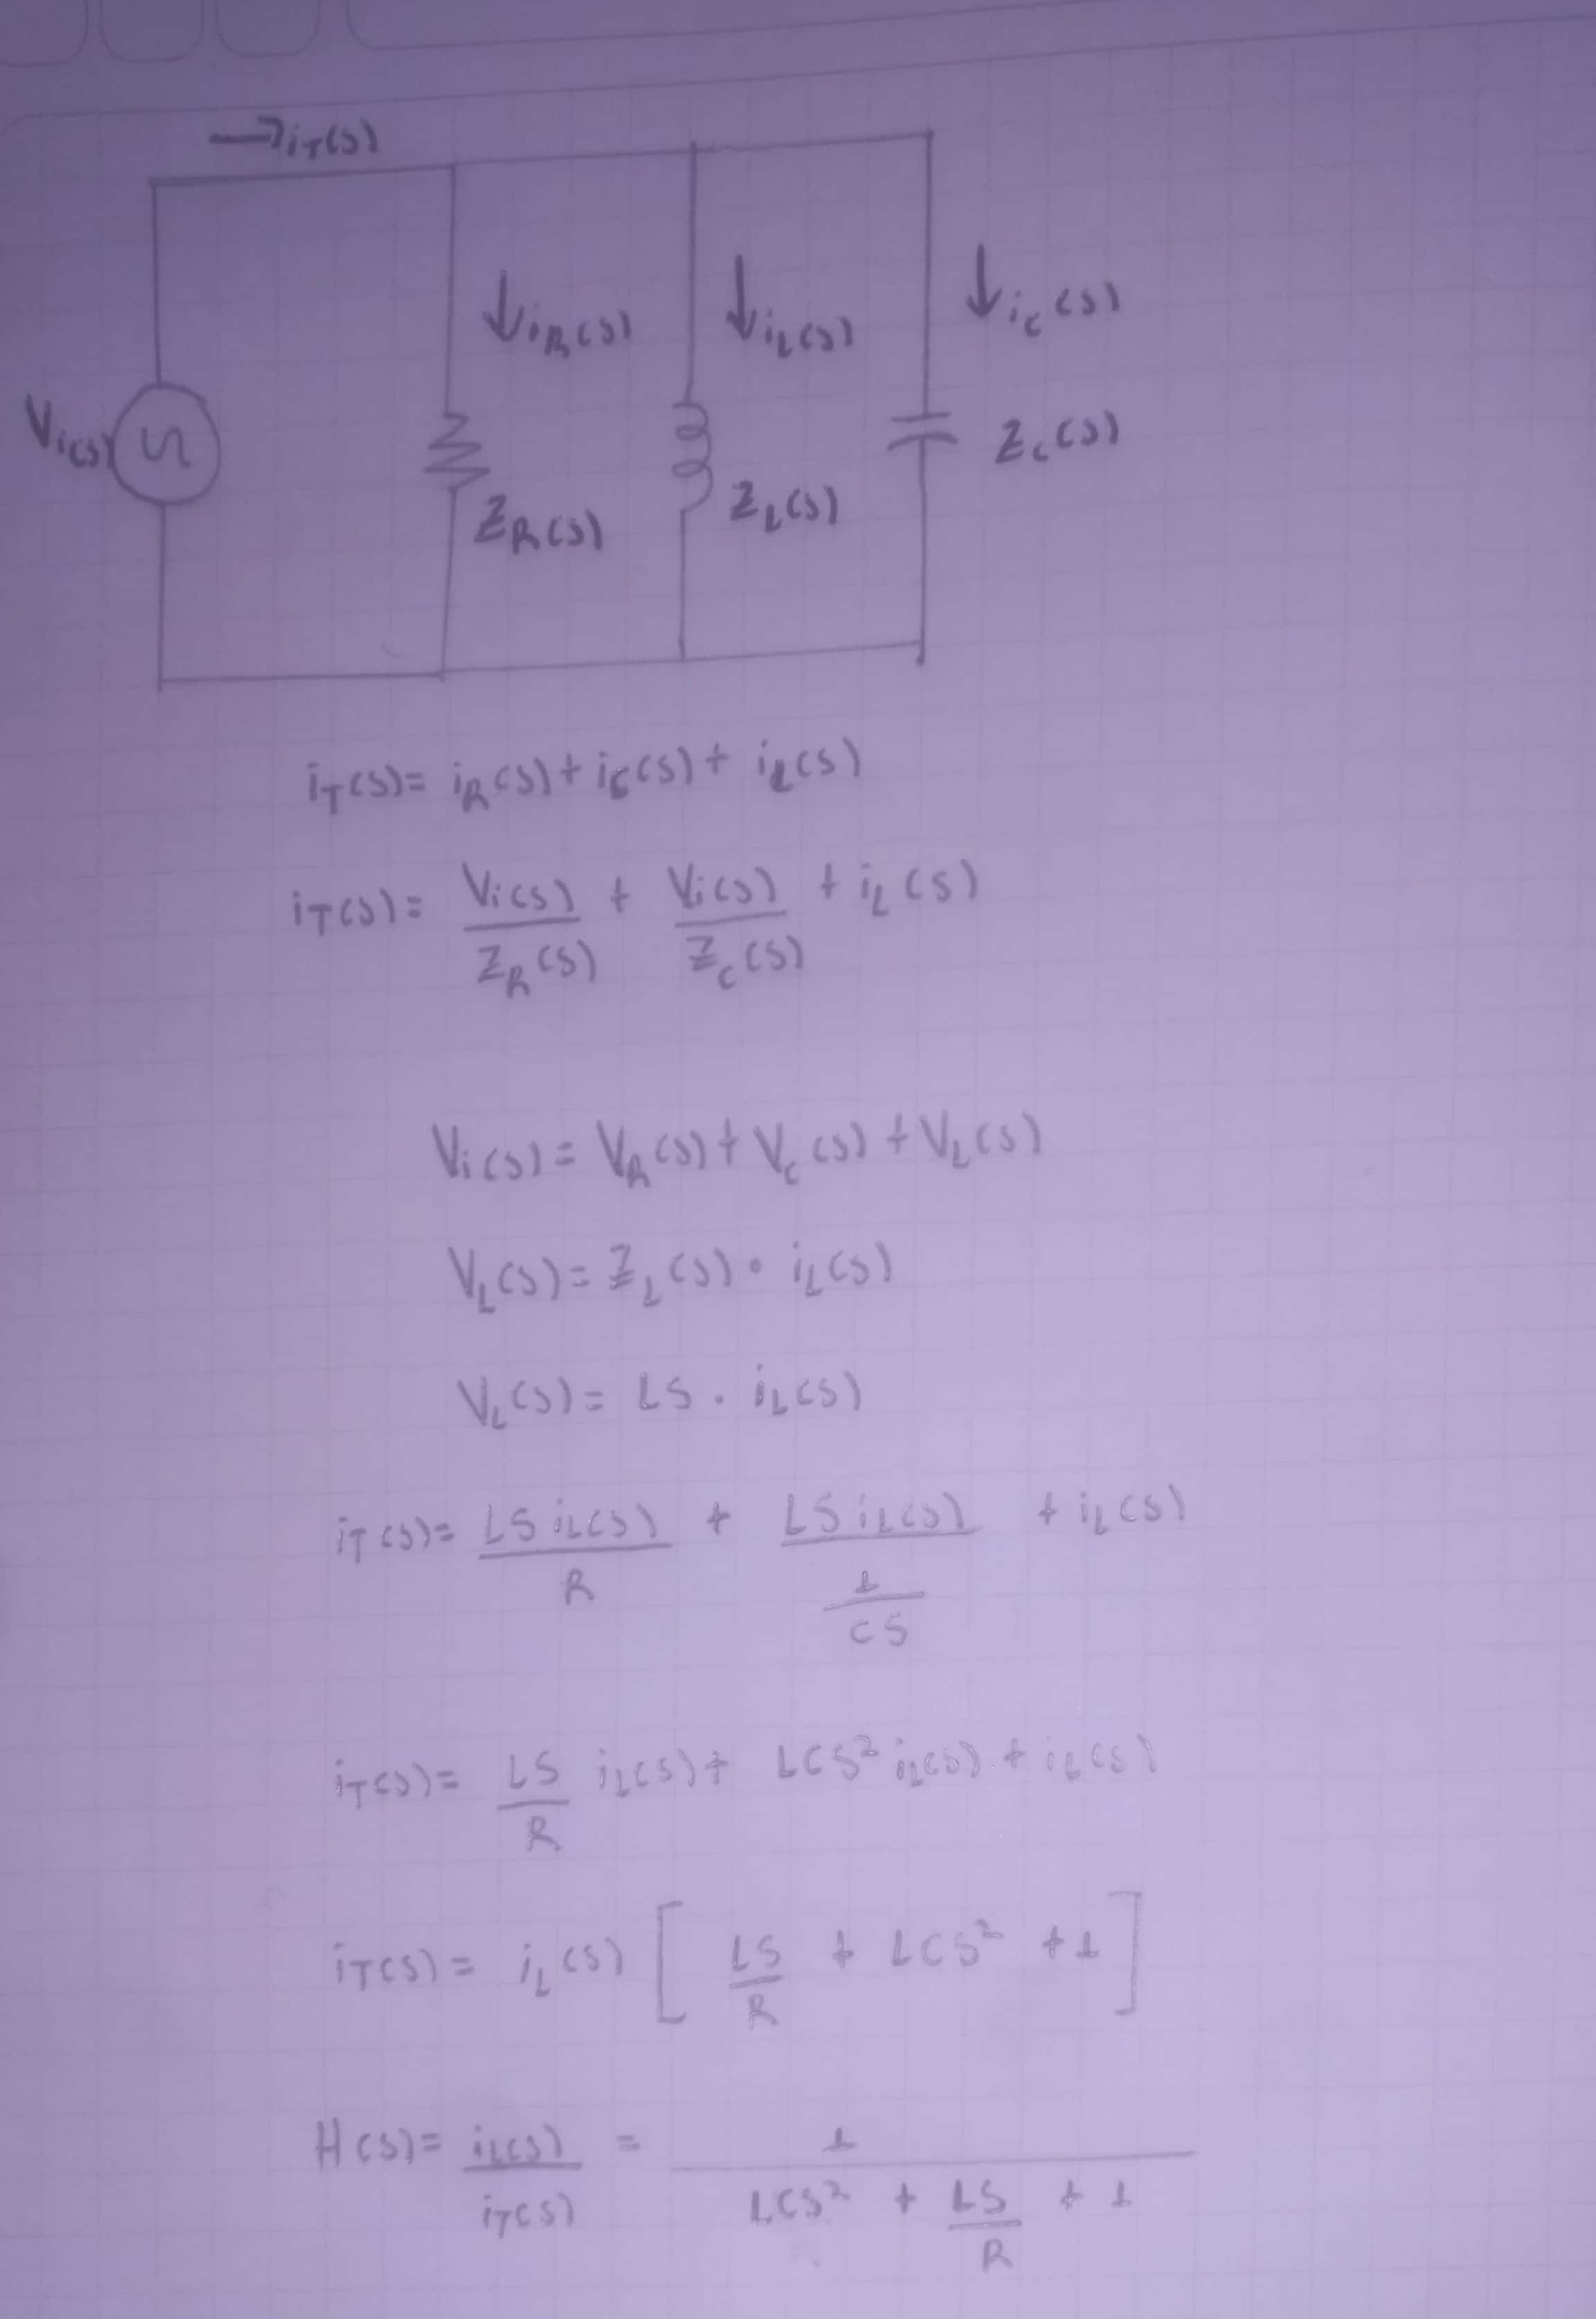

# Solución de SLIT -

# Principios básicos de modelado y control de sistemas utilizando fracciones parciales y [API de Control Sympy](https://docs.sympy.org/latest/modules/physics/control/lti.html)

## Ejemplo circuito RLC serie utilizando transformada de Laplace en Sympy

Juan Camilo Palacio Castaño jupalacioc@unal.edu.co
Andés Marino Álvarez Meza amalvarezme@unal.edu.co



In [57]:
import sympy as symº
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
H = control.TransferFunction(1,L*C*s**2 + (L/R)*s + 1, s)
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

         1          
────────────────────
  ⎛     2   L⋅s    ⎞
s⋅⎜C⋅L⋅s  + ─── + 1⎟
  ⎝          R     ⎠

In [58]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

    L⋅(C⋅R⋅s + 1)      1
- ────────────────── + ─
         2             s
  C⋅L⋅R⋅s  + L⋅s + R    

In [59]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

    ⎛  -t      ⎛     ____________⎞     -t      ⎛     ____________⎞⎞    
    ⎜ ─────    ⎜    ╱      2     ⎟    ─────    ⎜    ╱      2     ⎟⎟    
    ⎜ 2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟    2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟⎟    
    ⎜ℯ     ⋅cos⎜─────────────────⎟   ℯ     ⋅sin⎜─────────────────⎟⎟    
    ⎜          ⎝     2⋅C⋅√L⋅R    ⎠             ⎝     2⋅C⋅√L⋅R    ⎠⎟    
- L⋅⎜───────────────────────────── + ─────────────────────────────⎟ + 1
    ⎜              L                             ____________     ⎟    
    ⎜                                           ╱      2          ⎟    
    ⎝                                      √L⋅╲╱  4⋅C⋅R  - L      ⎠    

In [60]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

         -5⋅t                                
         ─────                               
           4      ⎛√55⋅t⎞    -5⋅t            
    √55⋅ℯ     ⋅sin⎜─────⎟    ─────           
                  ⎝  4  ⎠      4      ⎛√55⋅t⎞
1 - ───────────────────── - ℯ     ⋅cos⎜─────⎟
              11                      ⎝  4  ⎠

In [61]:
#Función de salida Y(s) -- Laplace
Ye

     2⋅s            
     ─── + 1        
      5            1
- ────────────── + ─
    ⎛ 2        ⎞   s
    ⎜s    s    ⎟    
  2⋅⎜── + ─ + 1⎟    
    ⎝5    2    ⎠    

In [62]:
#Función de salida y(t) -- en tiempo
yt

         -5⋅t                                
         ─────                               
           4      ⎛√55⋅t⎞    -5⋅t            
    √55⋅ℯ     ⋅sin⎜─────⎟    ─────           
                  ⎝  4  ⎠      4      ⎛√55⋅t⎞
1 - ───────────────────── - ℯ     ⋅cos⎜─────⎟
              11                      ⎝  4  ⎠

**Diagrama de polos y ceros utilizando la API de control**

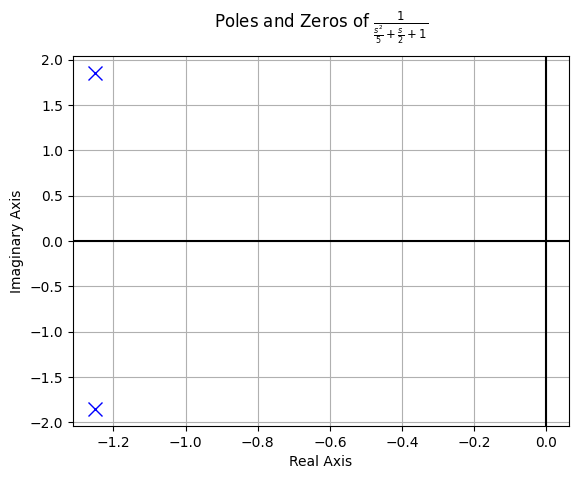

In [63]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

**Diagrama de bode**

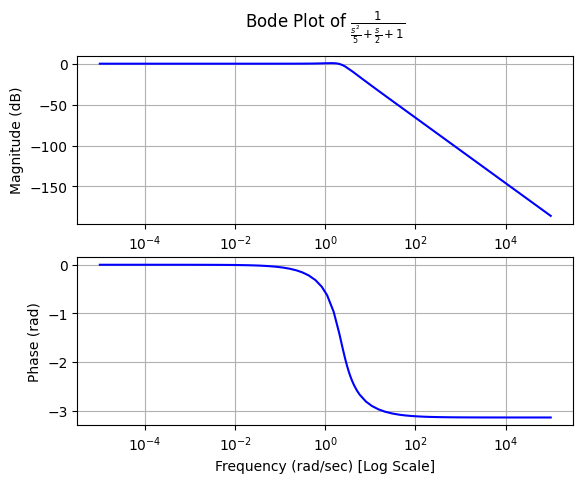

In [64]:
control.bode_plot(HRLC)

**Respuesta al impulso**

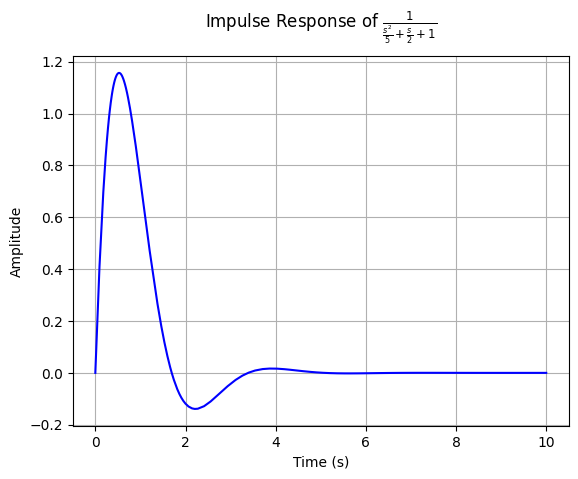

In [68]:
control.impulse_response_plot(HRLC)

**Respuesta al escalon**

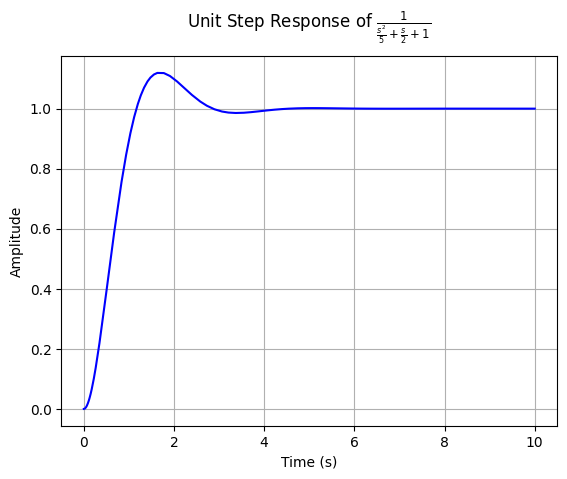

In [69]:
control.step_response_plot(HRLC)

**Respuesta a la rampa**

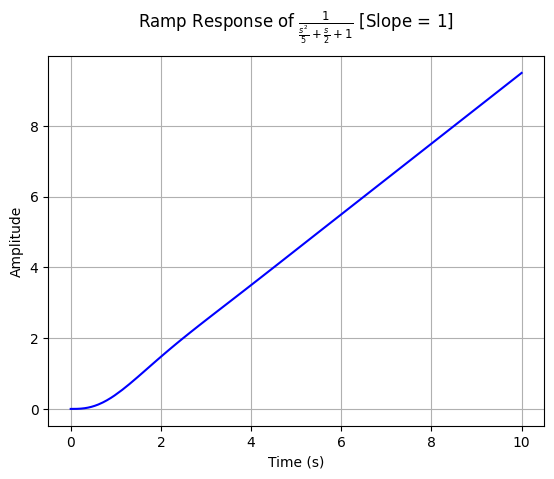

In [67]:
control.ramp_response_plot(HRLC)